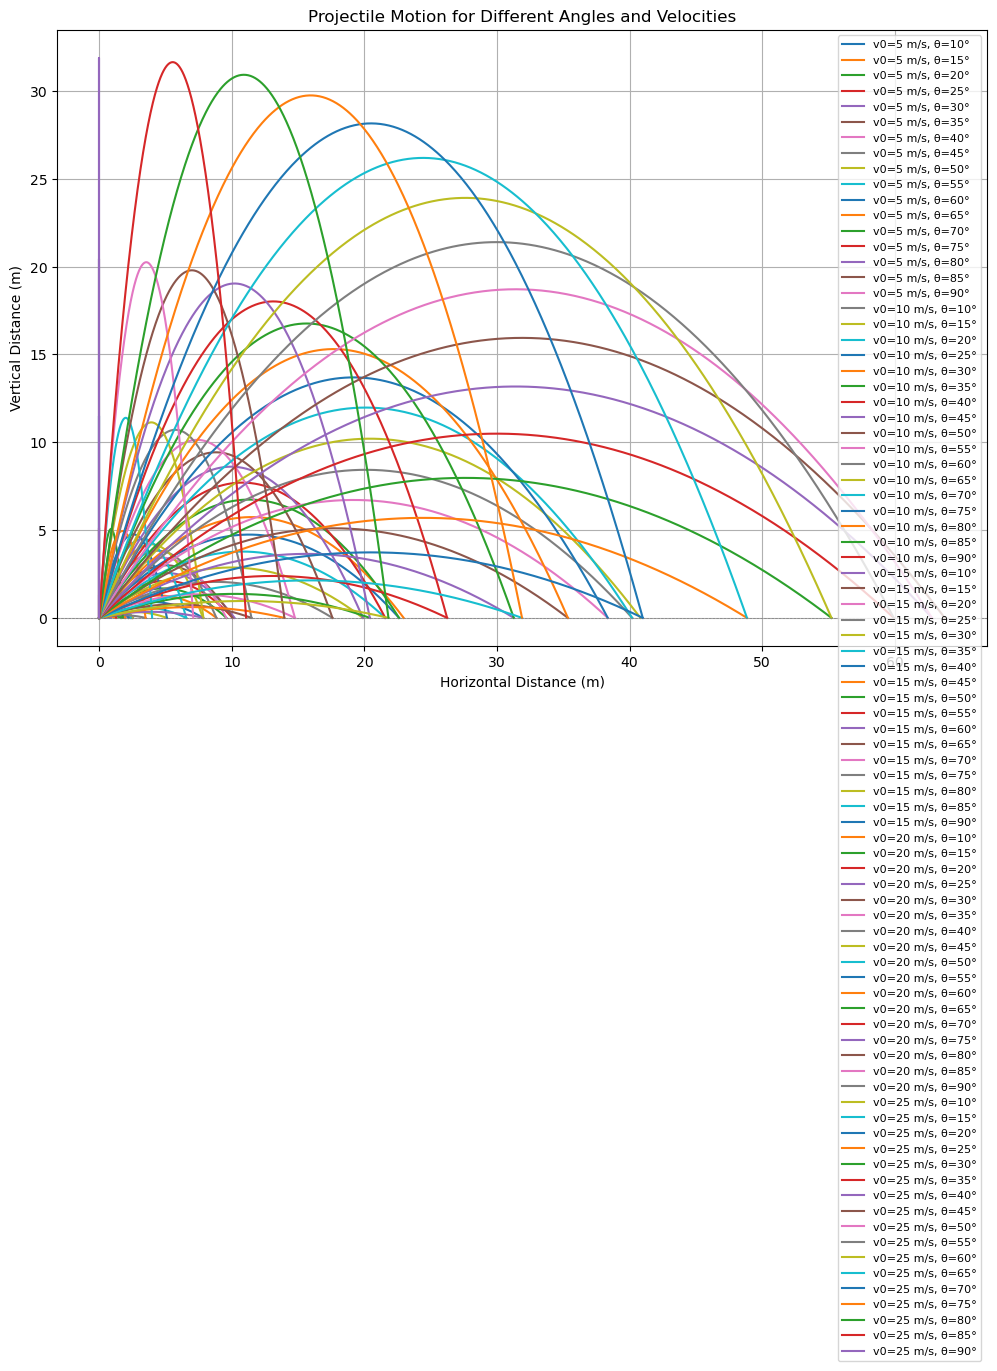

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.8  # Acceleration due to gravity in m/s^2
angles_deg = np.arange(10, 91, 5)  # Angles from 10° to 90° in steps of 10
velocities = [5, 10, 15, 20, 25]  # Different initial velocities

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each velocity and angle to calculate and plot trajectories
for v0 in velocities:
    for angle_deg in angles_deg:
        # Convert angle to radians
        angle_rad = np.radians(angle_deg)
        
        # Time of flight for this angle and velocity
        t_flight = 2 * v0 * np.sin(angle_rad) / g
        
        # Time points for plotting
        t = np.linspace(0, t_flight, num=500)
        
        # Calculate trajectory
        x = v0 * np.cos(angle_rad) * t  # Horizontal distance
        y = v0 * np.sin(angle_rad) * t - 0.5 * g * t**2  # Vertical distance
        
        # Plot the trajectory for this angle and velocity
        label = f"v0={v0} m/s, θ={angle_deg}°"
        plt.plot(x, y, label=label)

# Labels and title
plt.title("Projectile Motion for Different Angles and Velocities")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Ground line
plt.legend(fontsize=8, loc='upper right')  # Smaller legend to avoid clutter
plt.grid(True)

# Display the plot
plt.show()


Mean Squared Error (MSE): 51.50972791835843
Model coefficients: [ 2.51695956 -0.10739875]
Model intercept: -9.619129228887747
Estimated gravity (g) from model: 10.294515531933383


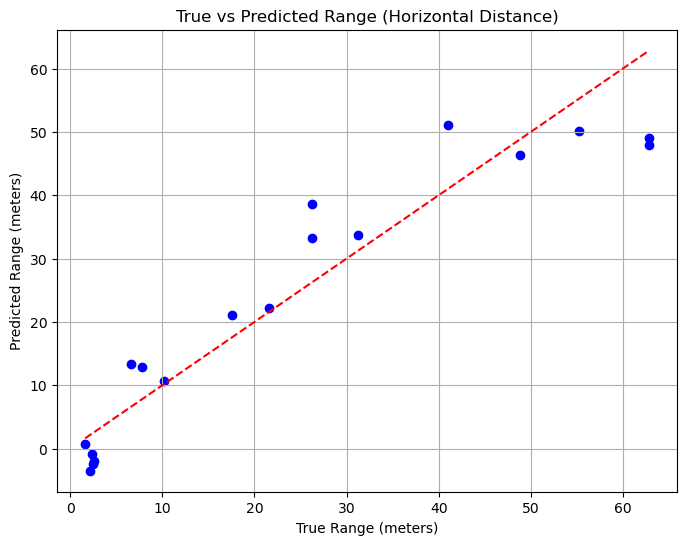

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Constants
true_g = 9.8  # True gravity value for comparison

# Function to generate data (features: v0, theta) and target: range R
def generate_data(velocities, angles_deg):
    data = []
    targets = []
    
    for v0 in velocities:
        for angle_deg in angles_deg:
            # Convert angle to radians
            angle_rad = np.radians(angle_deg)
            
            # Calculate the range (horizontal distance) using the projectile motion formula
            range_distance = (v0**2) * np.sin(2 * angle_rad) / true_g
            
            # Append features (v0, angle) and target (range)
            data.append([v0, angle_deg])
            targets.append(range_distance)
    
    return np.array(data), np.array(targets)

# Generate data for velocities and angles
velocities = [5, 10, 15, 20, 25]  # Different initial velocities
angles_deg = np.arange(20, 80, 5)  # Angles from 10° to 90° in steps of 10

X, y = generate_data(velocities, angles_deg)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model: Linear Regression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the range (horizontal distance) using the trained model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

# Extract the estimated gravity g from the model
# The formula is: R = (v0^2 * sin(2 * theta)) / g
# Rearranged: g = (v0^2 * sin(2 * theta)) / R

# Calculate g from model coefficients
# Model coefficients correspond to v0^2 and sin(2 * theta)
v0_coef = model.coef_[0]
theta_coef = model.coef_[1]

# To estimate g, we know that g = v0^2 * sin(2 * theta) / R, but the coefficients give us a linear relationship.
# So we'll extract the ratio using coefficients
estimated_g = (v0_coef * true_g) / (np.mean(y_pred) / true_g)

print(f"Estimated gravity (g) from model: {estimated_g}")

# Plotting: True vs Predicted Range
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("True Range (meters)")
plt.ylabel("Predicted Range (meters)")
plt.title("True vs Predicted Range (Horizontal Distance)")
plt.grid(True)
plt.show()


In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Constants for range of data
v0_range = np.array([5, 25])  # Velocity range (5 to 25 m/s)
theta_range = np.array([10, 90])  # Angle range (10 to 90 degrees)

# Generate synthetic data for training
velocities = np.random.uniform(v0_range[0], v0_range[1], 1000)
angles = np.random.uniform(theta_range[0], theta_range[1], 1000)
ranges = (velocities**2 * np.sin(2 * np.radians(angles))) / 9.8  # Using true physics for range

# Input features (velocity and angle)
X = np.vstack((velocities, angles)).T

# Target variable (range)
y = ranges

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model.add(Dense(1))  # Output layer with 1 neuron for the range prediction

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# Test the model with new data (velocity = 15 m/s, angle = 45 degrees)
new_data = np.array([[15, 45]])
predicted_range = model.predict(new_data)
print(f"Predicted range for v0=15 m/s and angle=45 degrees: {predicted_range[0][0]} meters")

# Estimate gravity (g) using the formula: g = (v0^2 * sin(2*theta)) / R
v0_test = 15  # test velocity in m/s
theta_test = 45  # test angle in degrees

# Calculate gravity using the predicted range
g_estimated = (v0_test**2 * np.sin(2 * np.radians(theta_test))) / predicted_range[0][0]
print(f"Estimated gravity (g) from the model prediction: {g_estimated:.2f} m/s²")


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 507.7994
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 263.7069
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 156.6904
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.5973
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64.1997
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.2214
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.6028
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.6734
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.9786
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.6458
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.3774
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.5737
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.3282
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.0827
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 361.4009
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 238.5997
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 142.3270
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.7618
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.5937
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.5267
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 54.4378
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.1144
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.5874
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.3167
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.1266
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.8435
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.2768
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.9290
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

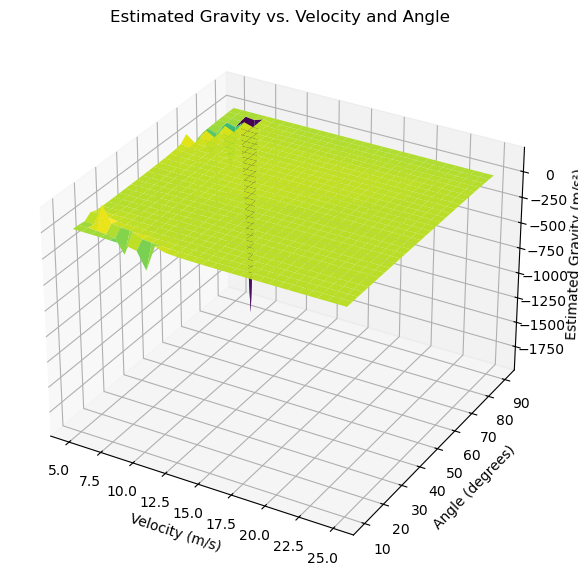

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Constants for range of data
v0_range = np.array([5, 25])  # Velocity range (5 to 25 m/s)
theta_range = np.array([10, 90])  # Angle range (10 to 90 degrees)

# Generate synthetic data for training
velocities = np.random.uniform(v0_range[0], v0_range[1], 1000)
angles = np.random.uniform(theta_range[0], theta_range[1], 1000)
ranges = (velocities**2 * np.sin(2 * np.radians(angles))) / 9.8  # Using true physics for range

# Input features (velocity and angle)
X = np.vstack((velocities, angles)).T

# Target variable (range)
y = ranges

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))  # Hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model.add(Dense(1))  # Output layer with 1 neuron for the range prediction

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# Create a grid of velocities and angles for plotting
v0_vals = np.linspace(v0_range[0], v0_range[1], 30)  # 30 points between 5 and 25 m/s
theta_vals = np.linspace(theta_range[0], theta_range[1], 30)  # 30 points between 10 and 90 degrees

# Create meshgrid of velocity and angle combinations
V0, Theta = np.meshgrid(v0_vals, theta_vals)
estimated_g = np.zeros_like(V0)

# Predict range and estimate gravity (g) for each combination of velocity and angle
for i in range(len(v0_vals)):
    for j in range(len(theta_vals)):
        v0_test = v0_vals[i]
        theta_test = theta_vals[j]
        
        # Predict range using the neural network
        predicted_range = model.predict(np.array([[v0_test, theta_test]]))
        
        # Estimate gravity using the formula
        g_estimated = (v0_test**2 * np.sin(2 * np.radians(theta_test))) / predicted_range[0][0]
        estimated_g[j, i] = g_estimated  # Store estimated g in the grid

# Plotting the estimated gravity surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(V0, Theta, estimated_g, cmap='viridis')

ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Angle (degrees)')
ax.set_zlabel('Estimated Gravity (m/s²)')
ax.set_title('Estimated Gravity vs. Velocity and Angle')

plt.show()
